**Multicolinearidade:** consequência da existência de alta correlação entre duas ou mais variáveis explicativas (preditoras).

• Possibilidade de interpretações erradas pela eventual distorção dos sinais dos parâmetros.

• Erros nas predições.

**Como detectar a multicolinearidade?**

◦ Sinais inesperados dos coeficientes.

◦ Testes t não significantes e teste F significante.

**Fontes Geradoras da Multicolinearidade:**

-Existência de variáveis que apresentam a mesma tendência durante alguns períodos, em decorrência da seleção de uma amostra que inclua apenas observações referentes a estes períodos.

-Utilização de amostras com reduzido número de observações

-Utilização de valores defasados em algumas das variáveis explicativas como “novas” explicativas

In [14]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
%matplotlib inline 
import statsmodels.api as sm

# Banco de dados 

In [15]:
# Carregando o dataset
dados = pd.read_csv('salarios.csv',encoding='latin1',sep=',')
dados = dados.set_index('nome')
dados

,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
nome,,,,,,,
Patricia,2525.340820,9.0,4.50,9.0,4.50,3.0,9.0
Luiz,2498.574951,8.0,4.00,8.0,4.00,7.0,8.0
Dalila,2364.686768,9.5,4.75,9.5,4.75,10.0,9.5
Leonor,1981.349854,7.0,3.50,7.0,3.50,10.0,7.0
Ovidio,1892.807983,6.0,3.00,6.0,3.10,7.0,6.0
Paulo,1561.437378,3.0,1.50,3.0,2.00,8.0,3.0
Leticia,1660.850830,4.0,2.00,4.0,2.00,9.9,4.0
Gustavo,2001.654297,5.0,2.50,5.0,2.50,9.8,5.0
Mariana,2150.777588,8.0,4.00,8.0,4.00,3.0,8.0


In [16]:
#Estatísticas univariadas
dados.describe()

,salario,rh1,econometria1,rh2,econometria2,rh3,econometria3
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,2032.150578,6.400000,3.200000,6.400000,3.240000,7.180000,6.400000
std,312.507361,2.221647,1.110823,2.221647,1.061367,3.169317,2.221647
min,1505.627563,3.000000,1.500000,3.000000,1.500000,1.400000,3.000000
25%,1870.515320,4.500000,2.250000,4.500000,2.250000,4.450000,4.500000
50%,2001.654297,7.000000,3.500000,7.000000,3.500000,8.000000,7.000000
75%,2219.607788,8.000000,4.000000,8.000000,4.000000,9.950000,8.000000
max,2525.340820,9.500000,4.750000,9.500000,4.750000,10.000000,9.500000


# Correlação de pearson para multicolinearidade

<AxesSubplot:>

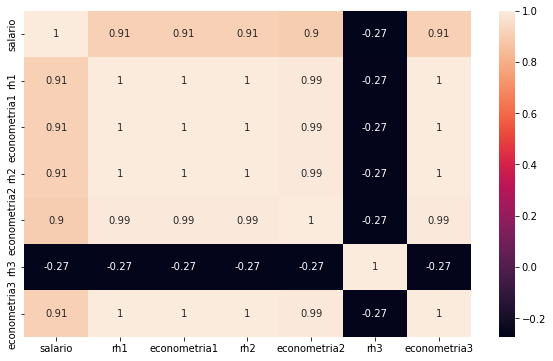

In [46]:
#Correlações
plt.figure(figsize=(10, 6))
sns.heatmap(dados.corr(),annot=True)

### 1° caso: Correlação perfeita, problema com multicolinearidade entre 2 variáveis explicativas 

<AxesSubplot:>

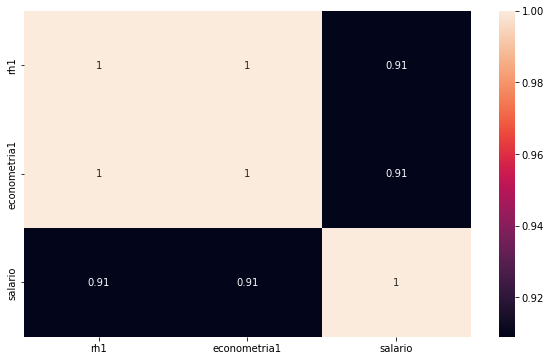

In [71]:
#Correlações
caso1 = dados[['rh1','econometria1','salario']]
plt.figure(figsize=(10, 6))
sns.heatmap(caso1.corr(),annot=True)

**Note que há variável 'econometria1' tem correlação perfeita com a variável 'rh1', vamos estimar o modelo de regressão linear para ver o que acontece**

In [72]:
#Variável selecionada
x = dados[['rh1','econometria1']]
y = dados['salario']

In [73]:
#Modelo Regressão Linear
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.69e-06
Time:                        14:12:46   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1213.7997    109.752     11.060      0.000     976.696    1450.904
rh1            102.2939     13.007      7.865      0.000      74.194     130.394
econometria1    51.1469      6.504      7.865      0.000      37.097      65.197
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                     5.33e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
#Variável selecionada
x = dados[['rh1']]
y = dados['salario']

#Modelo Regressão Linear
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.69e-06
Time:                        14:12:48   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1213.7997    109.752     11.060      0.000     976.696    1450.904
rh1          127.8673     16.259      7.865      0.000      92.742     162.992
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#Variável selecionada
x = dados[['econometria1']]
y = dados['salario']

#Modelo Regressão Linear
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     61.85
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.69e-06
Time:                        14:12:48   Log-Likelihood:                -93.807
No. Observations:                  15   AIC:                             191.6
Df Residuals:                      13   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1213.7997    109.752     11.060      0.000     976.696    1450.904
econometria1   255.7346     32.518      7.865      0.000     185.485     325.984
==============================================================================
Omnibus:                        2.049   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.492
Skew:                           0.601   Prob(JB):                        0.474
Kurtosis:                       2.028   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Podemos observar que os 3 modelos são identicos, apesar dos betas serem diferentes para equiparar o resultado final, porém o importante são as metricas geradas, valor da constante, AIC, BIC, R², Log-Likelihood etc**

### 2° caso: Correlação alta , porém não perfeita

<AxesSubplot:>

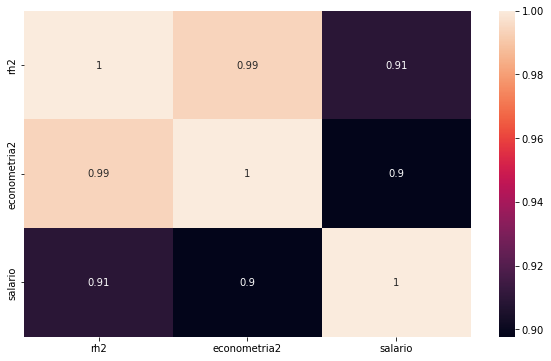

In [77]:
#Correlações
caso2 = dados[['rh2','econometria2','salario']]
plt.figure(figsize=(10, 6))
sns.heatmap(caso2.corr(),annot=True)

**Observe que as variáveis 'rh2' e 'econometria2' tem uma correlação de 0.99, quase perfeita**

In [79]:
#Variável selecionada
x = dados[['rh2','econometria2']]
y = dados['salario']

#Modelo Regressão Linear
modelo_coeangular = sm.OLS(y,x) #Somente o Coeficiente angular
x_interc = sm.add_constant(x) # Somente o Intercept
modelo = sm.OLS(y,x_interc) # funçao com os 2 coeficientes,(Primeiro o y depois o x)
resultado = modelo.fit() # Treinar o modelo
resultado.summary() # Verificar os dados do modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salario   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     29.10
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.50e-05
Time:                        14:18:41   Log-Likelihood:                -93.688
No. Observations:                  15   AIC:                             193.4
Df Residuals:                      12   BIC:                             195.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1241.8527    130.172      9.540      0.000     958.233    1525.473
rh2            194.0845    152.087      1.276      0.226    -137.285     525.454
econometria2  -139.4577    318.348     -0.438      0.669    -833.079     554.164
==============================================================================
Omnibus:                        1.720   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.423   Jarque-Bera (JB):                1.309
Skew:                           0.554   Prob(JB):                        0.520
Kurtosis:                       2.068   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
#Teste f
resultado.f_pvalue

2.495434959922304e-05

**Se analisarmos o valor do teste f, afirmamos que pelo menos 1 beta é estatisticamente significante a um nivel de significancia de 5%**

**Obs: Note que os valores dos betas são explosivos, tanto para positivo quanto negativo, isso já da indicios de que há no modelo variáveis multicolineares**

In [82]:
#Teste t
resultado.tvalues[1:]

rh2             1.276138
econometria2   -0.438066
dtype: float64

**Porem analisando os p_values, concluimos que nenhum deles é estatisticamente significante**

## Teste VIF e Tolerance 


Tolerancia = 1 - R², varia entre 0 a 1, quanto maior a tolerancia menor a correlação entre as variáveis

VIF = 1/Tolerancia, varia de 1 a +(infinito), VIFs acima de 5, já podem apresentar problemas de multicolinearidade, porém não existe um ponto de corte exato

In [91]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

x = dados[['rh2','econometria2']]
get_vif(x , dados)

,VIF,Tolerance
rh2,82.061458,0.012186
econometria2,82.061458,0.012186


**Outra forma usada para detectar a gravidade da multicollinearidade na análise de regressão**